<a href="https://www.kaggle.com/code/hossamrizk/simple-nlp-preprocessing?scriptVersionId=149260070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Why preprocessing?**

**Text data derived from natural language is unstructured and noisy. Text preprocessing involves transforming text into a clean and consistent format that can then be fed into a model for further analysis and learning.**

# **About dataset.**

**It contains 5000 positive tweets and 5000 negative tweets exactly.**

In [1]:
import string

import nltk # library for NLP

import re # library for regrural exression

from nltk.corpus import twitter_samples #twitter dataset from nltk

from nltk.corpus import stopwords # module for stop words that come with NLTK

from nltk.stem import PorterStemmer # module for stemming

from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [3]:
positive = twitter_samples.strings('positive_tweets.json')
negative = twitter_samples.strings('negative_tweets.json')
print('The Number of positive samples is' , len(positive))
print('The Number of negative samples is' , len(negative))

The Number of positive samples is 5000
The Number of negative samples is 5000


In [4]:
print('\033[92m' + positive[random.randint(0,5000)]) # positive sample in green
print('\033[91m' + negative[random.randint(0,5000)]) # negative sample in red

2 months waiting and I finally have my @Jack_Septic_Eye hoodie! :) eeeep! Yay! #SoHappyRightNow
@cuffyochickenn 😭 there's just no love anymore :(


In [5]:
tweet = positive[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


# **Regular expression**

**Regular expression is a language for specifying text search strings.RE helps us to match or find other strings or sets of strings, using a specialized syntax held in a pattern**

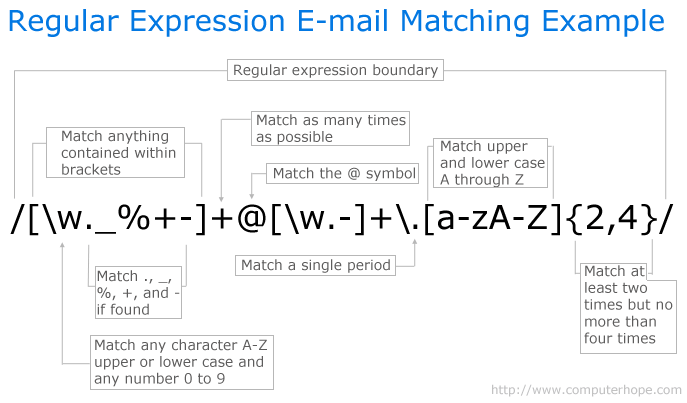

In [6]:
print('\033[92m' + tweet) # Green color before RE 
print('\033[94m') # Blue color after RE

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


# **Tokenization**

**Means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case**

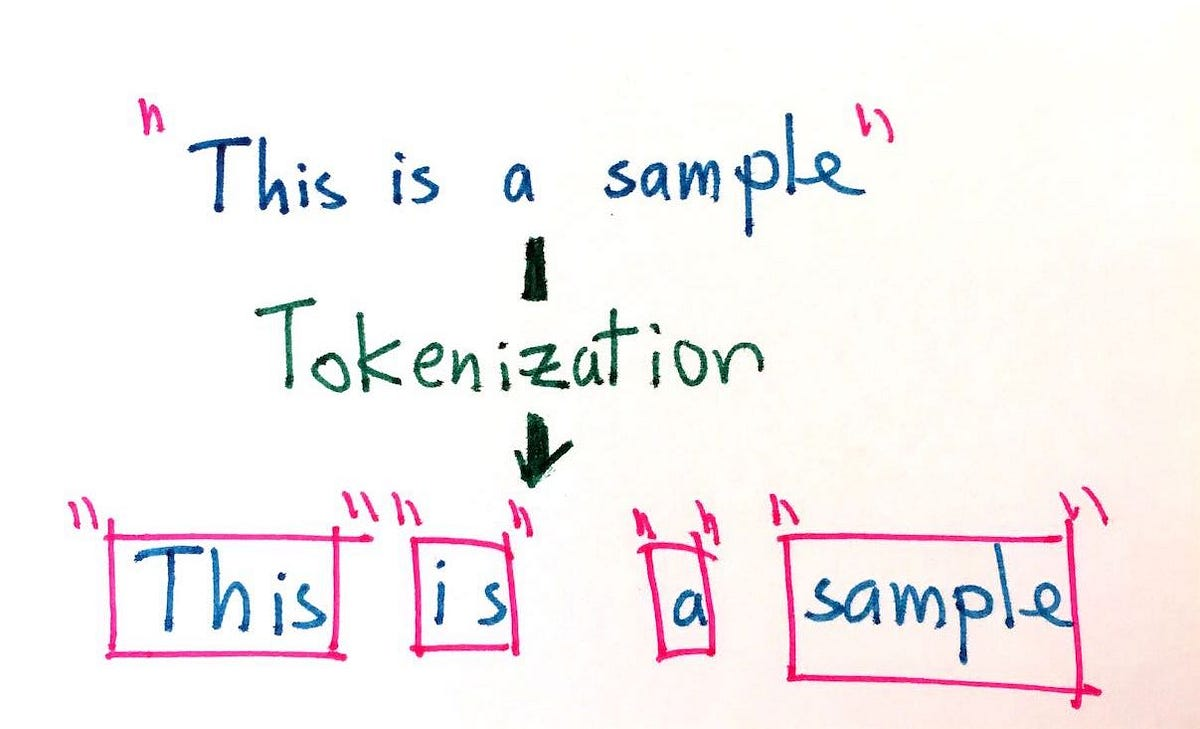

**preserve_case : Default value is True, keeps the capitalisation.**

**strip_handles : Default value is False, Remove the username from the given tweet text**

In [7]:
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False , strip_handles=True)
tweet_tokens = tokenizer.tokenize(tweet2)

print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


# **Stop Words**

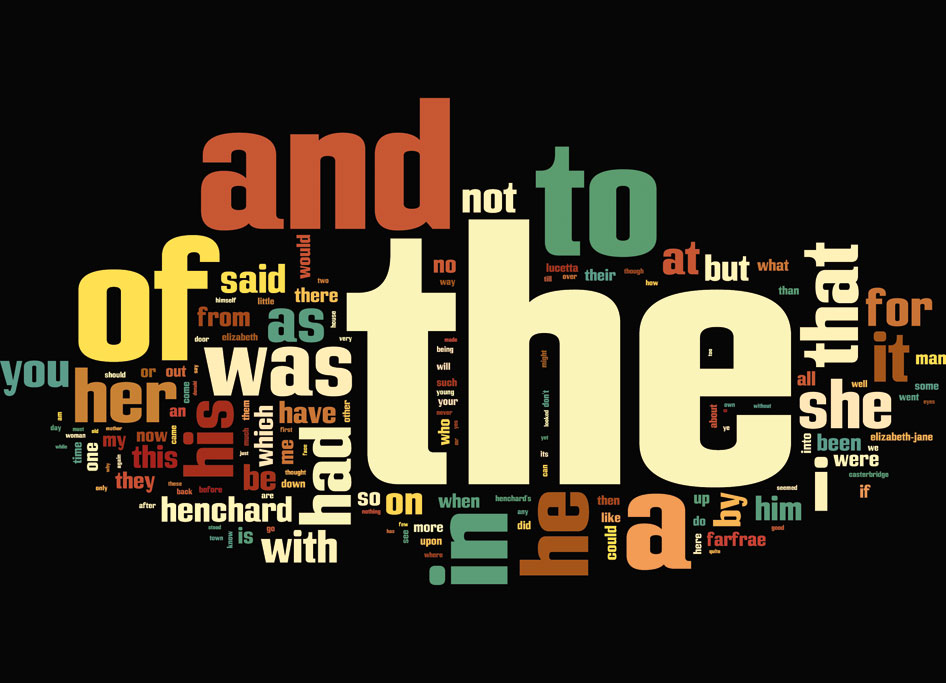

**Stop words are common words like ‘the’, ‘and’, ‘I’, etc. that are very frequent in text, and so don’t convey insights into the specific topic of a document. We can remove these stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.**

In [8]:
stopwords_english = stopwords.words('english') 
print('StopWords:')
print(stopwords_english)
print('--------------------------------------------------------------------------')
print('Punctuations:')
print(string.punctuation)

StopWords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [9]:
print('\033[92m')
print('Tweet before removing stop words:')
print(tweet_tokens)
print('\033[94m')

clean_tweet = [] # List to add new tokens
for word in tweet_tokens: 
    if word not in stopwords_english and word not in string.punctuation:
        clean_tweet.append(word)
        
print('Tweer after removing stop words:')
print(clean_tweet)


Tweet before removing stop words:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Tweer after removing stop words:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


# **Stemming**

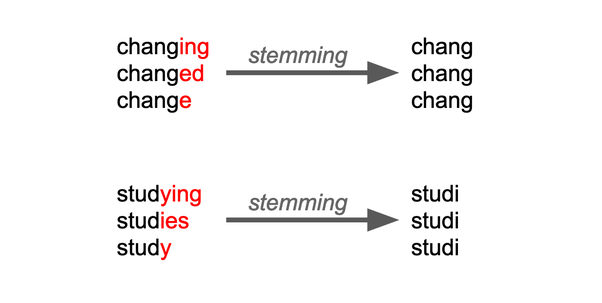

**Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.**

In [10]:
print('\033[92m')
print('Before stemming:')
print(clean_tweet)
print('\033[94m')

stemmer = PorterStemmer()
tweet_stemm = []

for word in clean_tweet:
    stemm_words = stemmer.stem(word)
    tweet_stemm.append(stemm_words)
    
print('After stemming:')
print(tweet_stemm)


Before stemming:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

After stemming:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
